# Python for R users
# Part 7: Visualization

In this notebook we will explore how R and Python differ in data visualization. 

I assume that most R power users will use ```ggplot``` for plotting in R.  There is a Python package called *plotnine* that allows one to use ggplot syntax within Python, but for the present purposes we are not going to use that because 1) it's not the Python way, 2) I don't particularly love ggplot, and 3) if you really want to use ggplot, you can just embed the R code in a cell within your Jupyter notebook.  Here we will primarily explore what is possible using the matplotlib and Seaborn libraries, but will also show how to embed ggplot directly in the notebook using R cells.

First we need to tell Jupyter to let us use R within this Python notebook and set up some necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("TkAgg")
import seaborn
import pandas
import numpy

# this is necessary to fix a bad interaction on Mac systems
# per: https://github.com/openai/spinningup/issues/16
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%load_ext rpy2.ipython
# this command tells Jupyter to automatically show any figures that we generate
%matplotlib inline  

/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


First let's load the UH2 data files and merge them.

In [53]:
data = pandas.read_csv('meaningful_variables_clean.csv', index_col=0)
demogdata = pandas.read_csv('demographics.csv', index_col=0)
mean_results = pandas.read_csv('arrest_ssrt_impulsivity.csv', index_col=0)
df = data.join(
    demogdata, how='inner').join(
        mean_results, how='inner').dropna(
            subset=['ArrestedChargedLifeCount',
                   'TrafficTicketsLastYearCount'])
df.head()

,adaptive_n_back.hddm_drift,adaptive_n_back.hddm_drift_load,adaptive_n_back.hddm_non_decision,adaptive_n_back.hddm_thresh,adaptive_n_back.mean_load.logTr,angling_risk_task_always_sunny.keep_adjusted_clicks,angling_risk_task_always_sunny.keep_coef_of_variation,angling_risk_task_always_sunny.release_adjusted_clicks,angling_risk_task_always_sunny.release_coef_of_variation.logTr,attention_network_task.alerting_hddm_drift,...,CaffieneOtherSourcesDayMG,GamblingProblem,TrafficTicketsLastYearCount,TrafficAccidentsLifeCount,ArrestedChargedLifeCount,MotivationForParticipation,MotivationOther,mean_impulsivity,mean_SSRT,EverArrested
s004,2.065906,-0.507549,0.037627,2.385402,0.854415,13.464286,2.937398,8.928571,1.181606,-0.485213,...,0.0,0.0,0.0,0.0,0.0,money,NaN,1.911021,200.211691,False
s005,3.221946,-1.235354,0.285800,1.580276,0.500775,36.363636,13.145868,30.500000,2.453175,-0.238605,...,0.0,1.0,0.0,3.0,5.0,money,NaN,2.088186,271.213365,True
s009,3.097061,-0.548677,0.229902,1.342728,0.993252,28.260870,5.136477,19.130435,1.589222,-0.277945,...,0.0,0.0,0.0,0.0,0.0,money,NaN,2.961991,159.057108,False
s011,1.635203,-0.056899,0.092145,1.503473,1.163151,40.555556,4.161762,18.333333,1.746829,-0.519528,...,160.0,0.0,0.0,0.0,0.0,money,NaN,2.060847,176.495160,False
s012,2.564846,-0.355632,0.244235,2.410489,1.178655,44.157895,6.148741,24.565217,2.145789,-0.575932,...,200.0,0.0,0.0,2.0,0.0,money,NaN,2.275128,237.863131,False


## Simple plots

First let's create a scatter plot showing mean SSRT versus mean impulsivity scores.  First we do it in R using ggplot:

/Users/poldrack/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


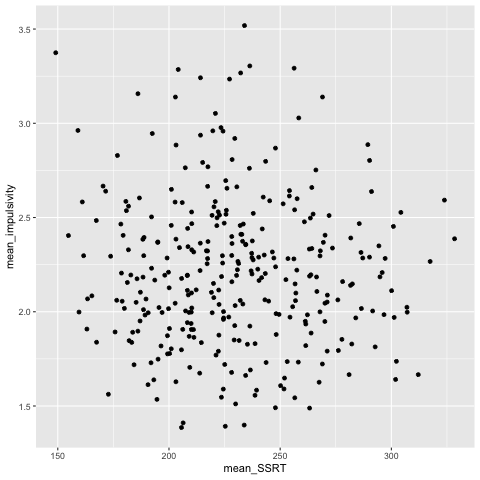

In [3]:
%%R -i df

library(ggplot2)
ggplot(df, aes(mean_SSRT, mean_impulsivity)) + 
  geom_point()

A similar plot in Python could be generated using Seaborn:

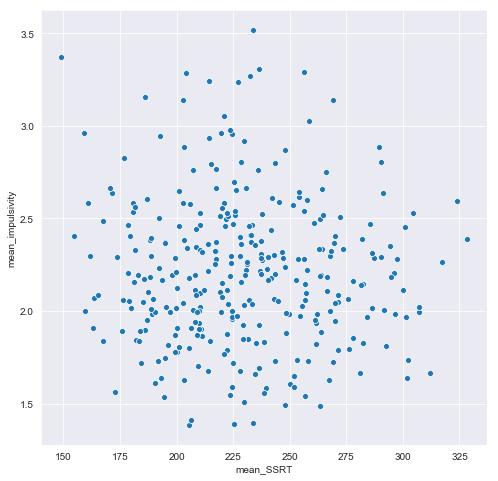

In [12]:
plt.figure(figsize=(8,8))
seaborn.set_style('darkgrid')
ax = seaborn.scatterplot(x='mean_SSRT',
                         y='mean_impulsivity',
                         data=df)


Now let's say that you want to generate a version of this plot that colors the points by whether the person has ever been arrested or not, and plot the size as the number of times arrested. In ggplot we would use the color argument:

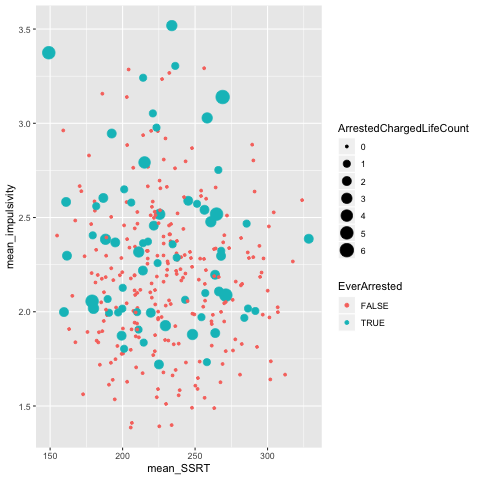

In [16]:
%%R -i df

library(ggplot2)
ggplot(df, aes(mean_SSRT, mean_impulsivity, color=EverArrested)) + 
  geom_point(aes(size=ArrestedChargedLifeCount))


In Seaborn we would do this using the ```hue``` and ```size``` arguments:

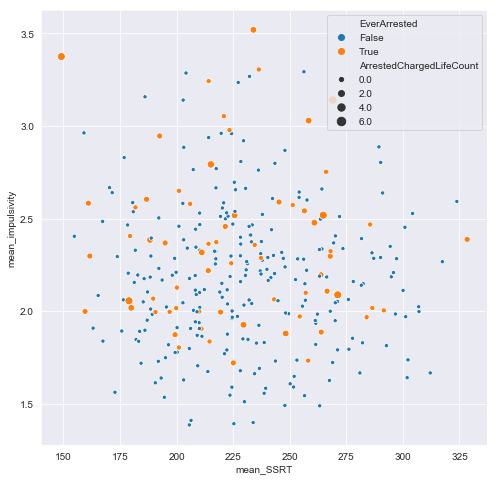

In [24]:
plt.figure(figsize=(8,8))
seaborn.set_style('darkgrid')
ax = seaborn.scatterplot(x='mean_SSRT',
                         y='mean_impulsivity',
                         hue='EverArrested',
                         size='ArrestedChargedLifeCount',
                         data=df)


It appears that there is a realtionship between impulsivity and arrests (and in fact our earlier analyses of these data also showed that). Let's play impulsivity versus arrest, using violin plots for each level, and a smoothed regression fit.

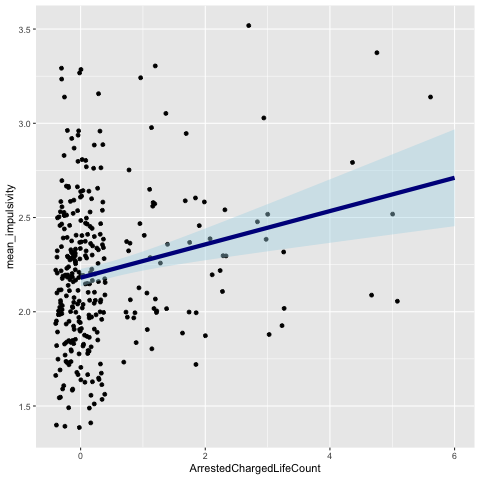

In [48]:
%%R -i df

library(ggplot2)
ggplot(df, aes(x = ArrestedChargedLifeCount,y = mean_impulsivity)) + 
  geom_point(position = "jitter") + 
    geom_smooth(aes(x = ArrestedChargedLifeCount,y = mean_impulsivity),
                fill="lightblue",color="darkblue",size=2,method="lm")


<Figure size 576x576 with 0 Axes>

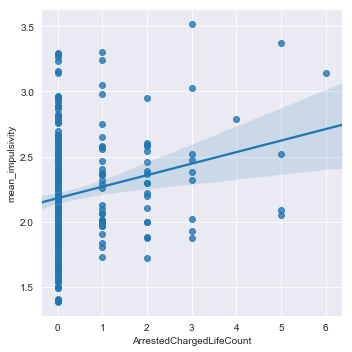

In [58]:
plt.figure(figsize=(8,8))
seaborn.set_style('darkgrid')
ax = seaborn.lmplot(x='ArrestedChargedLifeCount',
                    y='mean_impulsivity',
                    data=df)
